In [2]:
import Exploratory_Data_Functions
import importlib
importlib.reload(Exploratory_Data_Functions)
from Exploratory_Data_Functions import *

In [3]:
tdc = pd.read_csv('data_sets/wr_tdc_clean.csv')

## Fill in with zero's 

Let's replace the np.nan or '' entries with zero's as long as we're sure of

In [6]:
tdc.iloc[:,13:21] = tdc.iloc[:,13:21].fillna(0)

In [188]:
columns_numbers = list(range(13,21))+list(range(60,73))+list(range(75,83))+[85]
tdc_numbers = tdc.iloc[:,columns_numbers]
tdcnc = tdc_numbers.corr(method='pearson')

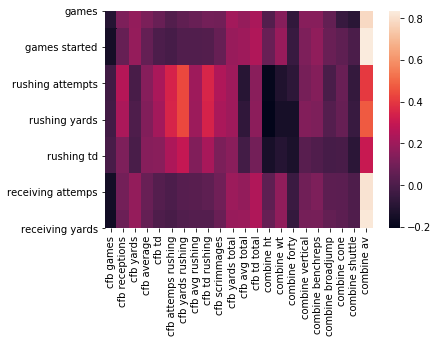

In [189]:
_ = sn.heatmap(tdcnc.loc['games':'receiving yards','cfb games':], annot=False)

## Let's collect more data: number of yards per season. 
We need to access the nfl table again, using the 'nfl method' and 'nfl table type'

- success from main and Receiving & Rushing Table: use nfl url, capture first table
- success from main and others: nothing (players with little game, no other stats)
- success from main1: use nfl url, capture table with 'Receiving & Rushing Table'
- success from main2/3: use nfl url, capture table 'Rushing & Receiving Table', invert,
- fail after main1: nothing (player never used for receiving but has other stats)
- fail (eg link broken): nothing

If we have a nfl table, we store the data from the column 'yards' per season into a list of floats. Otherwise, we just return [0]

In [58]:
tdc['nfl method'].value_counts()
#tdc[(tdc['nfl method'] == 'success from main2')]['nfl table type'].value_counts()

success from main        269
success from main1        50
fail (eg link broken)     49
fail after main1          20
success from main3         3
success from main2         2
Name: nfl method, dtype: int64

In [157]:
#ind_try = [0, 23, 16, 30, 73, 24]
url = 'https://www.pro-football-reference.com/players/G/GreeA.00.htm'
#url = 'https://www.pro-football-reference.com/players/J/JohnRo05.htm'
#url = 'https://www.pro-football-reference.com/players/P/PilaKe00.htm'
#url = 'https://www.pro-football-reference.com/players/M/McClDe00.htm'
#url = 'https://www.pro-football-reference.com/players/I/IgleJu00.htm'
#url = 'https://www.pro-football-reference.com/players/M/McKnSc00.htm'

#url = 'https://www.pro-football-reference.com/players/S/SalaGr00.htm'

soup = BeautifulSoup(urlopen(url),'html.parser')
table_0_soup = soup.find_all('table')[0]
table_nfl = nflstats(table_0_soup)

# table_list = generate_all_nfl_tables(url)
# table_0_soup = find_nfl_table(table_list, 'Rushing & Receiving Table')
# table_nfl = nflstats(table_0_soup)
# table_nfl = switch_rushing_receiving(table_nfl)

r = table_nfl.loc[0:overall_nfl_index(table_nfl)-1,'yards']
pd.to_numeric(table_nfl.loc[0:overall_nfl_index(table_nfl)-1,'yards'], errors='coerce').fillna(0.0)

In [7]:
rlist = main(tdc, 'yards')

In [8]:
rdf = pd.DataFrame(rlist)

In [9]:
rdf.to_csv('data_sets/rdf.csv',index=False)